<p style="align: center;"><img src="https://static.tildacdn.com/tild6636-3531-4239-b465-376364646465/Deep_Learning_School.png", width=500></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h2 style="text-align: center;"><b>Object detection</b></h2>

<p style="text-align: center;"><i>Руководитель проекта: Илья Захаркин (Сколтех, МФТИ) | @ilyazakharkin</i></p>

<p style="text-align: center;"><img src="https://miro.medium.com/max/750/1*LTPAzUjUentTWoXXmqoT9g.jpeg"></p>

<h2 style="text-align: center;"><b>Этапы работы</b></h2>

Проект подразумевает выполнение всеми участниками пунктов 1-2, и далее выбор каждым слушателем своего сценария -- 1 или 2. Можно сделать оба сценария, то есть обучить модель на своих данных и её же встроить в демо, но для этого стоит быть готовым к удвоению затрачиваемого на проект времени.

<h3 style="text-align: center;"><b>Общий этап работы</b></h3>

**Hint**: если у вас на компьютере нет GPU, то лучше с самого начала делать все в Google Colab.

**1). Выбор фреймворка/библиотеки для использования детектора**

Чтобы освежить память о задаче детекции можно посмотреть [лекцию этого года](https://www.youtube.com/watch?v=8D01Xo9hWgg&t=10s).

В выборе фреймворка предоставляется свобода, лично я рекомендовал бы один из:
- `torchvision.models.detection` и `torchhub`: "нативные" модели для детектирования прямо из PyTorch. Примеры использования есть прямо на занятиях DLSchool по практике CV [2019 года](https://www.youtube.com/watch?v=XSPYe4-y4HE) и [2020 года](https://www.youtube.com/watch?v=JX6N74K84n0);
- `mmdetection`: как с ним работать рассказывается в [практическом занятии 2020 года](https://www.youtube.com/watch?v=gw_IXcbhOO0).
- `detectron2`: краткая информация есть в конце [занятия DLSchool по практике CV](https://www.youtube.com/watch?v=XSPYe4-y4HE), можно начать с него. Лучше самостоятелньо изучить [официальный репозиторий](https://github.com/facebookresearch/detectron2) и уже с ним работать в дальнейшем ("Quick Start");
- `TensorFlow Object Detection API`: как с ним работать рассказывается в [занятии 2018 года](https://www.youtube.com/watch?v=xHIzyrU1uVM). Работать предстоит с [официальным репозиторием](https://github.com/tensorflow/models/tree/master/research/object_detection).

Рекомендую выбрать один из них и работать уже с этим модулем.

> Результатом пункта является зафиксированный фреймворк для нейросети-детектора.

---



#Был выбран фреймворк ***torchvision.models.detection*** для выполнения проекта.


---



**2). Запуск детектора на случайных изображениях**

Этот пункт просто про то, чтобы запустить любую модель детектирования в выбранном выше репозитории. Таким образом, часть с запуском будет работать, и далее уже можно приступать к основным сценариям.

> Результатом пункта явлется набор изображений, на которых модель успешно отработала и результат детекции виден и понятен.

In [27]:
#подключение необходимых библиотек
import torchvision
from PIL import Image, ImageDraw, ImageFont
import torchvision.transforms as transforms
import io
import urllib.request
import numpy as np

#скачивание модели и перевод её в режим предсказаний
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

#скачиваем картинку из интернета и открываем её
urllib.request.urlretrieve('https://www.harley-davidson.com/content/dam/h-d/images/product-images/bikes/motorcycle/2020/2020-street-750/gallery/2020-street-750-motorcycle-g3.jpg?impolicy=myresize&rw=1050', 'test.jpg')
image = Image.open('test.jpg')

#преобразование изображения и получаем предсказания модели на нашу фотографию
tf = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize(
                                     [0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])])
tensor = tf(image).unsqueeze(0) / 255.0
outputs = model.forward(tensor)

#устанавливаем порог score'а
THRESH = 0.5

#вытаскиваем предсказанные данные из outputs
boxes = outputs[0]['boxes'][outputs[0]['scores'] > THRESH]
labels = outputs[0]['labels'][outputs[0]['scores'] > THRESH]
labels_dict = dict()
labels_dict['labels'] = labels
labels = labels_dict['labels'].detach().numpy()
boxes_dict = dict()
boxes_dict['boxes'] = boxes
boxes_new = boxes_dict['boxes'].detach().numpy()


#рисуем наше изображение
draw = ImageDraw.Draw(image)

#список классов модели(MS COCO 2017)
list_classes = ['person','bicycle','car','motorcycle','airplane','bus','train','truck','boat','traffic light','fire hydrant','stop sign','parking meter','bench','bird','cat','dog','horse','sheep','cow','elephant','bear','zebra','giraffe','backpack','umbrella','handbag','tie','suitcase','frisbee','skis','snowboard','sports ball','kite','baseball bat','baseball glove','skateboard','surfboard','tennis racket','bottle','wine glass','cup','fork','knife','spoon','bowl','banana','apple','sandwich','orange','broccoli','carrot','hot dog','pizza','donut','cake','chair','couch','potted plant','bed','dining table','toilet','tv','laptop','mouse','remote','keyboard','cell phone','microwave','oven','toaster','sink','refrigerator','book','clock','vase','scissors','teddy bear','hair drier','toothbrush']

#нанесение предсказанных элементов на изображение
font = ImageFont.truetype(r'/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', 20) 
for id, box in enumerate(boxes_new):
    draw.rectangle(((box[0], box[1]), (box[2], box[3])), outline='red')
    draw.text((box[0], box[1]), list_classes[labels[id]-1], font=font)

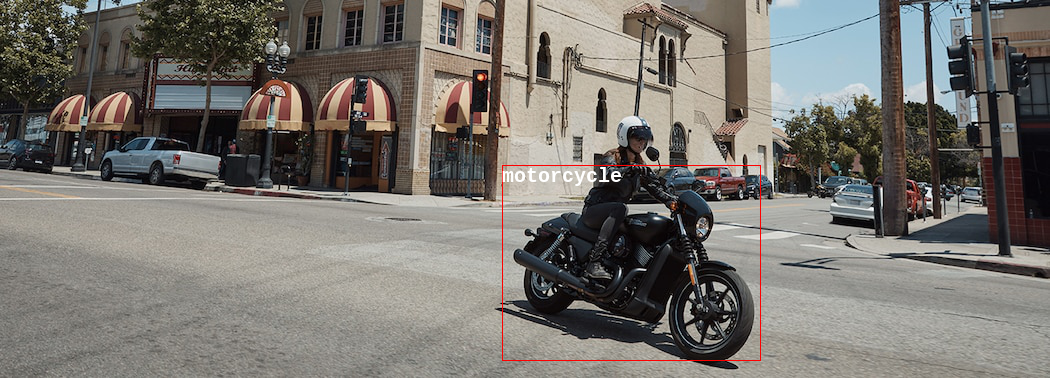

In [28]:
image

#Была скачана модель FasterRCNN(с ResNet-50). Также дали модели сдетектировать одно изображение по которому видно, что модель обрабатывать по большей части объекты на переднем плане, оставляя далекие объекты без внимания.



---



<h3 style="text-align: center;"><b>1 сценарий</b></h3>

В первом сценарии упор делается на разработку демо, в которое встривается нейросетевая модель для детекции.

Если у Вас есть опыт веб- или мобильной разработки, то можете использовать именного его и работать в рамках привычных Вам инструментов. Главное, чтобы в итоге они позволяил встроить в себя нейросетевой детектор, на вход которому будут поступать картинки.

Изображения на вход демо могут поступать с веб-камеры, из файлов, по ссылке или с камеры мобильного телефона -- способ может быть любой (на Ваш выбор). Демо должно показывать, что детектор успешно отрабатывает на поданных изображениях и находит нужные объекты. Оформлять красиво визуальную часть демо -- приветствуется, но не обязательно -- это может быть просто кнопка "загрузить" и показ фото до/после детекции.

**3). Выбор фреймворка/библиотеки для разработки веб/мобильного демо**

Основным инструментом для разработки веб-демо будет микрофреймворк **Flask**: [серия туториалов на русском](https://habr.com/ru/post/346306/).   
Полезные ресуры:
- [курс по веб-разработке](https://www.youtube.com/playlist?list=PLzQrZe3EemP5KsgWGnmC0QrOzQqjg3Kd5), нас интересуют первые 7 видео в плейлисте. В частности, нужны видео по Flask, там очень хорошие обучалки параллельно с лектором;
- [исчерпывающий справочник по Flask (англ)](https://www3.ntu.edu.sg/home/ehchua/programming/webprogramming/Python3_Flask.html);
- можно посмотреть мой [репозиторий с реализацией веб-демо](https://github.com/izaharkin/Respalyzer) для ML-задачи оценки отзывов.

Для разработки мобильного демо стоит выбрать инстурмент на свое усмотрение:
- под Android: [пример на Pytorch Mobile](https://towardsdatascience.com/object-detector-android-app-using-pytorch-mobile-neural-network-407c419b56cd), [пример на TensorFlow Lite](https://www.tensorflow.org/lite/models/object_detection/overview). **Примечание** от Дмитрия Шумилина: на Android с TF Lite на момент января 2021 есть [ошибка](https://github.com/tensorflow/models/issues/9341) с новым форматом хранения модели. Можно попробовать возможное [решение](https://www.youtube.com/watch?v=syTKGY-H44E&ab_channel=DoomsdayRobotics) или писать на чистом Java. Также можно попробовать использовать более старые версии TensorFlow, в которых проблем совместимости еще не было, например, [v2.1.0](https://github.com/tensorflow/tensorflow/releases/tag/v2.1.0).
- под iOS: [пример на TensorFlow Lite Swift API](https://www.tensorflow.org/lite/guide/inference#load_and_run_a_model_in_swift), [пример с Vision Framework](https://developer.apple.com/documentation/vision/recognizing_objects_in_live_capture) на "чистом" Swift'е.

Разумеется, лучше **самостоятельно поискать видео/статьи** на тему использования моделей на мобильных устройствах.

> Результатом пункта является зафисированный для вас инстурмент для разработки демо.

#Был выбран микрофреймворк ***Flask*** для разработки демо.


---



**4). Разработка демо**

Этот пункт про сам процесс написания кода для демо. 

> Результатом пункта является код, который можно запустить. Не хватать будет только логики детектора, сам интерфейс должен быть уже рабочим.

###Так как многие туториалы рассказывают о работе с файлами для поднятия сервера, то я решил также работать через терминал в Colab'е.

In [ ]:
!mkdir static
!mkdir templates

In [31]:
with open('static/style.css', 'x') as f:
    f.write('''html,
body {
  height: 100%;
}

body {
    display: -ms-flexbox;
    display: flex;
    -ms-flex-align: center;
    align-items: center;
    padding-top: 40px;
    padding-bottom: 40px;
    background-repeat: no-repeat;
    background-attachment: fixed;
    background-color: #08AEEA;
    background-image: linear-gradient(0deg, #FA8072 0%, #FFFF00 100%);
}

img {
    border-radius: 8px;
    max-width: 28%;
    height: auto;
}

.div-index {
    display: flex;
    flex-direction: column;
    align-items: center;
    width: 100%;
    margin: auto;
    padding: 1em;
}

.inp {
    max-width: 35%;
}''')

In [ ]:
with open('templates/result.html','x') as f:
    f.write('''<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Результат</title>
    <!-- Bootstrap CSS -->
    {{ bootstrap.load_css() }}
    <link rel= "stylesheet" type= "text/css" href= "{{ url_for('static', filename='style.css') }}">
</head>
<body>
    <div class="div-index">
        <h5>Ваше изображение:</h5>
        <img src="{{ img_original }}" alt="Your image">
        <h5>Изображение с детекцией:</h5>
        <img src="data:image/png;base64,{{ img_with_boxes }}" alt="Your image">
        <a href="/" class="mt-2 btn btn-info" role="button" aria-pressed="true">Повторить попытку</a>
    </div>
    <a href="https://github.com/Predvestnil" class="blockquote text-right">
                <p class="fs-1">Страница создателя сайта</p>
                <svg xmlns="http://www.w3.org/2000/svg" width="16" height="16" fill="currentColor" class="bi bi-github" viewBox="0 0 16 16">
  <path d="M8 0C3.58 0 0 3.58 0 8c0 3.54 2.29 6.53 5.47 7.59.4.07.55-.17.55-.38 0-.19-.01-.82-.01-1.49-2.01.37-2.53-.49-2.69-.94-.09-.23-.48-.94-.82-1.13-.28-.15-.68-.52-.01-.53.63-.01 1.08.58 1.23.82.72 1.21 1.87.87 2.33.66.07-.52.28-.87.51-1.07-1.78-.2-3.64-.89-3.64-3.95 0-.87.31-1.59.82-2.15-.08-.2-.36-1.02.08-2.12 0 0 .67-.21 2.2.82.64-.18 1.32-.27 2-.27.68 0 1.36.09 2 .27 1.53-1.04 2.2-.82 2.2-.82.44 1.1.16 1.92.08 2.12.51.56.82 1.27.82 2.15 0 3.07-1.87 3.75-3.65 3.95.29.25.54.73.54 1.48 0 1.07-.01 1.93-.01 2.2 0 .21.15.46.55.38A8.012 8.012 0 0 0 16 8c0-4.42-3.58-8-8-8z"></path>
</svg>
              </a>
</body>
</html>''')

In [ ]:
with open('templates/index.html','x') as f:
    f.write('''<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Detection</title>
    <!-- Bootstrap CSS -->
    {{ bootstrap.load_css() }}
    <!-- Style CSS -->
    <link rel= "stylesheet" type= "text/css" href= "{{ url_for('static', filename='style.css') }}">
</head>

<body>
    <form method="post" class="div-index">
        <p class="h3 mb-3 font-weight-normal">Faster-RCNN with ResNet-50(Детектирование изображений)</p>
        <p class="font-weight-normal">Вставьте URL-адрес изображения, которое хотите сдетектировать</p>
        <input type="url" name="url" class="inp mb-3 form-control">
        <button type="submit" class="btn btn-info">Сдетектировать</button>
    </form>
    <a href="https://github.com/Predvestnil" class="blockquote text-right">
                <p class="fs-1">Страница создателя веб-сайта</p>
                <svg xmlns="http://www.w3.org/2000/svg" width="16" height="16" fill="currentColor" class="bi bi-github" viewBox="0 0 16 16">
  <path d="M8 0C3.58 0 0 3.58 0 8c0 3.54 2.29 6.53 5.47 7.59.4.07.55-.17.55-.38 0-.19-.01-.82-.01-1.49-2.01.37-2.53-.49-2.69-.94-.09-.23-.48-.94-.82-1.13-.28-.15-.68-.52-.01-.53.63-.01 1.08.58 1.23.82.72 1.21 1.87.87 2.33.66.07-.52.28-.87.51-1.07-1.78-.2-3.64-.89-3.64-3.95 0-.87.31-1.59.82-2.15-.08-.2-.36-1.02.08-2.12 0 0 .67-.21 2.2.82.64-.18 1.32-.27 2-.27.68 0 1.36.09 2 .27 1.53-1.04 2.2-.82 2.2-.82.44 1.1.16 1.92.08 2.12.51.56.82 1.27.82 2.15 0 3.07-1.87 3.75-3.65 3.95.29.25.54.73.54 1.48 0 1.07-.01 1.93-.01 2.2 0 .21.15.46.55.38A8.012 8.012 0 0 0 16 8c0-4.42-3.58-8-8-8z"></path>
</svg>
              </a>
</body>
</html>''')

**5). Встраивание модели-детектора в демо**

Этот пункт про процесс дописывания кода, который будет обеспечивать "логику" демо $-$ само детектирование.

> Результатом пункта является код, который можно запустить и продемонстрировать работающую систему детектирования объектов.

In [ ]:
!pip install flask-ngrok
!pip install Flask==1.0.3
!pip install Bootstrap-Flask==1.4
!pip install https://download.pytorch.org/whl/cpu/torch-1.5.0%2Bcpu-cp37-cp37m-linux_x86_64.whl
!pip install https://download.pytorch.org/whl/cpu/torchvision-0.6.0%2Bcpu-cp37-cp37m-linux_x86_64.whl
!pip install numpy==1.16.4
!pip install Pillow
!pip install gunicorn==19.9.0
!pip install requests==2.23.0

In [ ]:
with open('app.py','x') as f:
    f.write('''import io
import base64
import requests
import torchvision
import torchvision.transforms as transforms
from PIL import Image, ImageDraw, ImageFont
from flask import Flask, render_template, request, redirect
from flask_ngrok import run_with_ngrok

from flask_bootstrap import Bootstrap

app = Flask(__name__)
run_with_ngrok(app)
Bootstrap(app)
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()


def transform_image(image):
    tforms = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize(
                                     [0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])])
    return tforms(image).unsqueeze(0) / 255.0


def get_prediction(image):
    tensor = transform_image(image=image)
    outputs = model.forward(tensor)
    return outputs


def plot_preds(source_img, boxs, lbels):
    labels = lbels['labels'].detach().numpy()
    boxes = boxs['boxes'].detach().numpy()

    #список классов модели(MS COCO 2017)
    list_classes = ['person','bicycle','car','motorcycle','airplane','bus','train','truck','boat','traffic light','fire hydrant','stop sign','parking meter','bench','bird','cat','dog','horse','sheep','cow','elephant','bear','zebra','giraffe','backpack','umbrella','handbag','tie','suitcase','frisbee','skis','snowboard','sports ball','kite','baseball bat','baseball glove','skateboard','surfboard','tennis racket','bottle','wine glass','cup','fork','knife','spoon','bowl','banana','apple','sandwich','orange','broccoli','carrot','hot dog','pizza','donut','cake','chair','couch','potted plant','bed','dining table','toilet','tv','laptop','mouse','remote','keyboard','cell phone','microwave','oven','toaster','sink','refrigerator','book','clock','vase','scissors','teddy bear','hair drier','toothbrush']
    draw = ImageDraw.Draw(source_img)
    font = ImageFont.truetype(r'/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', 80)
    for id, box in enumerate(boxes):
        draw.rectangle(((box[0], box[1]), (box[2], box[3])), outline='red')
        draw.text((box[0], box[1]), list_classes[int(labels[id]-1)], font=font)
    return source_img


@app.route('/', methods=['GET', 'POST'])
def predict():
    if request.method == 'POST':
        url = request.form.get('url')
        try:
            r = requests.get(url)
        except requests.exceptions.RequestException:
            return redirect(request.url)
        image_bytes = r.content
        image = Image.open(io.BytesIO(image_bytes)).convert('RGB')
        preds = get_prediction(image=image)

        #устанавливаем порог score'а
        THRESH = 0.5

        #вытаскиваем предсказанные данные из outputs
        boxes = preds[0]['boxes'][preds[0]['scores'] > THRESH]
        labels = preds[0]['labels'][preds[0]['scores'] > THRESH]
        labels_dict = dict()
        labels_dict['labels'] = labels
        boxes_dict = dict()
        boxes_dict['boxes'] = boxes

        img_with_boxes = plot_preds(image, boxes_dict, labels_dict)
        output = io.BytesIO()
        img_with_boxes.save(output, format='PNG')
        output.seek(0, 0)
        output_s = output.read()
        b64 = base64.b64encode(output_s).decode('ascii')
        return render_template('result.html', img_original=url, img_with_boxes=b64)
    return render_template('index.html')


if __name__ == '__main__':
    app.run()
''')

**6). Тестирование демо**

Здесь нужно запустить ваше демо на как можно большем количестве примеров, чтобы понять, в чем его сильные и слабые стороны. То есть какие объекты/сцены детектор обрабатывает легко, а с какими ему справится сложно. Нужно предложить также пути для улучшения модели на основе увиденных ошибок.

> Результатом пункта является набор изображений, на которых демо отработало. Для каждого изображения нужно добавить комментарии, почему модель справилась хорошо/плохо, предложить пути ее улучшения.

In [ ]:
!python app.py

К сожалению, я не смог отвести проекту нужноое количество времени, поэтому я не смог реализовать загрузку фото с диска, либо с камеры. Реализована лишь загрузка через URL-адрес. И данная реализация порождает пару проблем: не ко всем изображениям в сети Интернет можно напрямую обратиться; на некоторых сайтах стоят защиты, которые мешают моему детектору скачивать изображения.

загружено.png

На первом изображении видно, что детектор отрезал части машины, то есть не совсем справился с задачей регрессии. Задача классификации была решена верна.

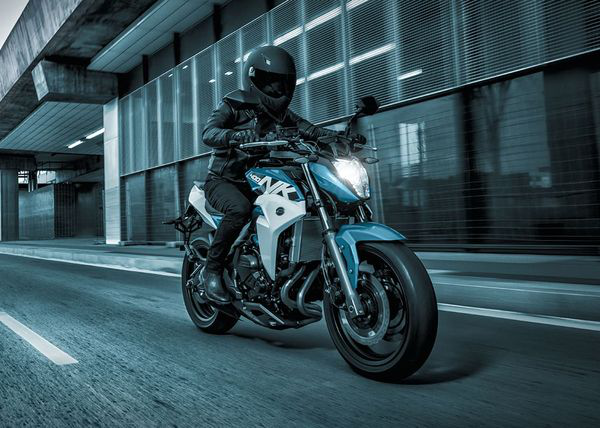

Тут ничего модель не сдетектировала,хотя есть person и motorcycle. Возможно изображение однотонное, которое не вписывается в датасет, на котором обучалась модель, поэтому score маленький.

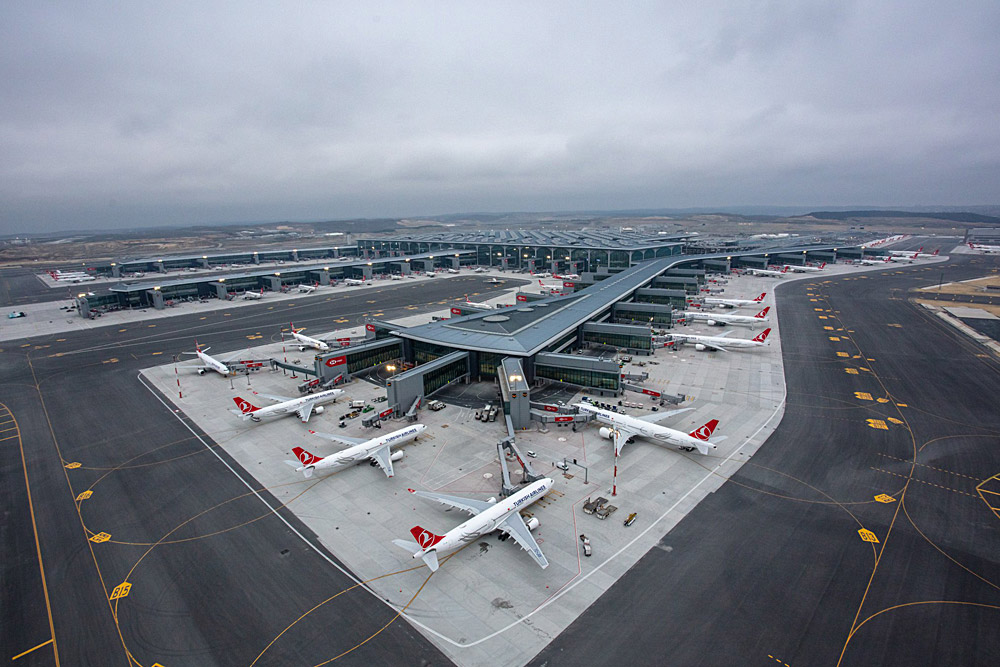

На этом изображении тоже детектор ничего не увидел. Скорее всего, плохо обучена классификационная сеть(backbone), так как score довольно маленький реальных объектов и они одного значения с нереальными объектами(мусором), поэтому снижения значения THRESH решит проблему несдетектированных объектов, но появится много мусора.

Вывод: требуется переобучить модель-классификатор на более обширном датасете и желательно для более узкого количества классов.

**7). Оформление демо для показа другим людям**

В этом пункте можно пойти двумя путями:
1. Проделать работу по улучшению визуальной составляющей демо (интерфейс)
2. Загрузить модель на какой-нибудь сервер/хост/test-flight (в случае мобильного iOS-демо), чтобы к демо можно было обратиться прямо в адресной строке браузера

\> По *первому пункту* могу посоветовать использовать библиотеку [Bootstrap](https://habr.com/ru/post/349060/), для мобильного демо элементы UI/UX являются частью основной разработки (поэтому стоит просто погуглить/почитать документацию).

\> *Второй пункт - в случае веб-демо*: 

Способ 1: Google Cloud Engine.

Если ваше приложение требует установки системных пакетов, например, через `apt-get install`, то вам придется работать на выделенном сервере VPN или на виртуальной машине. К счастью тот же [Google Cloud](https://cloud.google.com/compute) предоставляет бесплатные 300$ на 90 дней использования Виртуальной машиной, чего хватит в большинстве случаев. Эти ссылки помогут вам понять, как в таком случае создать виртуальную машину, установить и настроить виртуальное окружение и вебсервер, а также задеплоить проект:

- [Deploying a Flask app to a Virtual Machine](https://www.youtube.com/watch?v=a2g9pDleGQk&ab_channel=JulianNash)
- [Set up Gunicorn and Nginx](https://www.digitalocean.com/community/tutorials/how-to-serve-flask-applications-with-gunicorn-and-nginx-on-ubuntu-20-04-ru)

Способ 2: Heroku.

Если с GCE проблемы/не хочется привязывать карту и т.д., могут помочь эти ресурсы и сервис [Heroku](https://www.heroku.com/):
- [Flask deployment](http://www.tutorialspoint.com/flask/flask_deployment.htm)
- [Deploy Flask app to Heroku (youtube)](https://www.youtube.com/watch?v=pmRT8QQLIqk)
- [Deploy Flask app to Heroku (medium)](https://medium.com/the-andela-way/deploying-your-flask-application-to-heroku-c99050bce8f9)
- [Set your own domain name on Heroku](https://devcenter.heroku.com/articles/custom-domains)

\> *Второй пункт - в случае мобильного демо*: 

Здесь с как таковым деплоем сложнее, обычно мобильные приложения публикуются или в Google Play (Android), или в AppStore (iOS). Однако можно снять **видеопоказ экрана (скринкаст)** с использованием написанного приложения - вполне подойдет для публичной демонстрации.

В ходе работы с html-шаблонами и css: был использован Bootstrap, который позволил при минимальных усилиях достичь приятного для глаз дизайна.

<h2 style="text-align: center;"><b>Критерии оценивания</b></h2>

* 1 пункт $-$ 1 балл 
* 2 пункт $-$ 1 балл 
* 3 пункт $-$ 0 баллов (промежуточный пункт)  
* 4 пункт $-$ 3 балла   
* 5 пункт $-$ 3 балла   
* 6 пункт $-$ 1 балл 
* 7 пункт $-$ 1 балл 
* Максимум баллов по проекту $-$ 10  

**Успехов в выполнении проекта!** 

Желаю всем проделать полезную, интересную и качественную работу, которую потом нестыдно и в резюме указать, и друзьям показать ;)